# Can we predict Pokemon Type 1 or HP based on given information?
## Authors:
*   Edgar Leos Almanza
*   Cesar Sanchez
*   Moses Garcia
---

## Introduction:

For our project, we worked on a Pokemon dataset that includes the type of Pokemon and their statistics. The objective of this project is to predict the Pokemon's HP based off of the given information. This project might be a bit challenging but definitely worth the struggle as we will be discovering new ways to identify a Pokemon's HP based on essential information. This project allows us to relive our childhood. If we are able to predict the Pokemon's HP based on the Attack, Defense, Sp. Atk, Sp. Def, Speed, and Generation we essentually become better "Pokemon trainers" and eventually Pokemon masters.

# Clear Description of the Source Data Set (Predictions and Features)

This project consists of the Pokemon.csv data set which includes **13 features**, with **800 samples**. The data set consists of columns pertaining to the 
Pokemon's statistics such as: Type, HP, Attack, Defense, etc. Some of the features that will be used as predictors are: _HP_, _Attack_, _Defense_, 
_Sp. Atk_, _Sp. Def_. 

After getting an idea of the data that we were working with, we decided to drop **Total** and **Type 2** as those features would not be needed 
in order to make our predictions. After dropping some features, the data that was left behind contained **2 categorical features**: _Name_, and _Type 1_ and **8 numerical features**: 
_#_, _HP_, _Attack_, _Defense_, _Sp. Atk_, _Sp. Def_, _Speed_, and _Generation_.

# Preliminary Work on Data Preperation

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  9 17:16:48 2021

@authors: cesanchez, eleos-almanza, mosegarcia
"""
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display


# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

In [2]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

In [3]:
#import pokemon dataframe
df = pd.read_csv("https://raw.githubusercontent.com/EdgarLeos/pandas/main/Pokemon.csv?token=AP7V5NEX4ZUMLRL2ZDECRQTAEWOX4")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
# Get an idea of what info the Data frame has
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


# Premiliminary Work on Data Exploration and Visualization 

### Showing the types of Pokemon in our datset.

Text(0.5, 1.0, 'Pokemon Types')

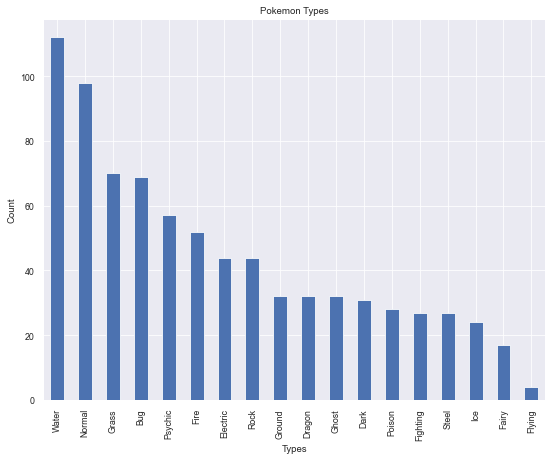

In [5]:
df['Type 1'].value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Types")
plt.title('Pokemon Types')

### Showing the total average of the Pokemon's stats combined per type

Text(0.5, 1.0, 'Average Stats of Pokemon')

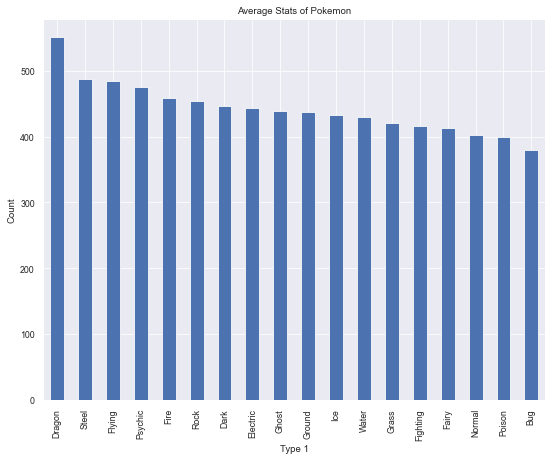

In [6]:
df.groupby(['Type 1'])['Total'].mean().sort_values(ascending = False).plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Type 1")
plt.title('Average Stats of Pokemon')

### Displaying average HP per Pokemon Type

Text(0.5, 1.0, 'Average HP with type of Pokemon')

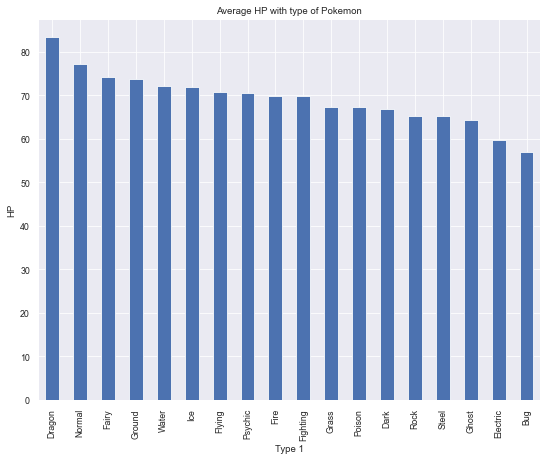

In [7]:
df.groupby(['Type 1'])['HP'].mean().sort_values(ascending = False).plot(kind='bar')
plt.ylabel("HP")
plt.xlabel("Type 1")
plt.title('Average HP with type of Pokemon')

### Displaying the amount of pokemon created in each generation within our dataset

Text(0.5, 1.0, 'Number of Generations in set')

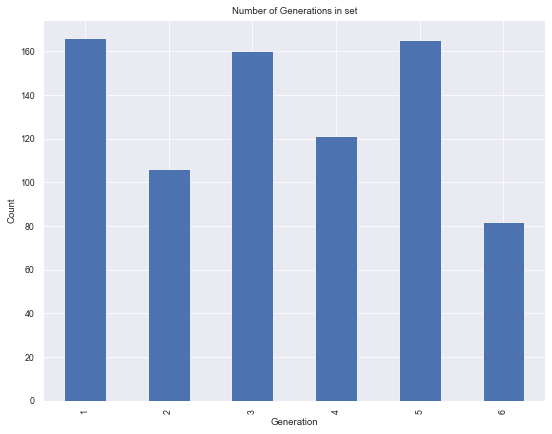

In [8]:
df['Generation'].value_counts().sort_index().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Generation")
plt.title('Number of Generations in set')

### Dropping "Total" and "Type 2" since they were not going to be relevant of our predictions and model. 

In [9]:
df.drop(['Total', 'Type 2'], axis=1)

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,80,160,60,170,130,80,6,True


# Preliminary Work on Machine Learning to make Predictions 

We will use numerical data from the "HP" and calculations (total's/averages) from the "Attack" , "Defense", "Sp. Attack", "Sp. Defense" to try to predict a Pokemon's Type as well as Generation and HP. 
We will be using kNN classification and regression algorithms for our predictions and will determine which one is the most accurate one as well as calculate which prediction will be the most accurate

# Linear Regression Prediction on HP

In [10]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

We will use a subset of the data set for our training and test data. We will keep an unscaled version of the data for one of the experiments that we will be conducting.
Since our dataframe is not too large we will then conduct the prediction experiments with the entire dataframe to compare the differences. 

### **This first set of plots we see the relationships between HP and some of the other features**.

We will be analyzing the relationship that the Pokemon's statistics have. In order to to come up with a strategy to effectively predict a Pokemon's HP.

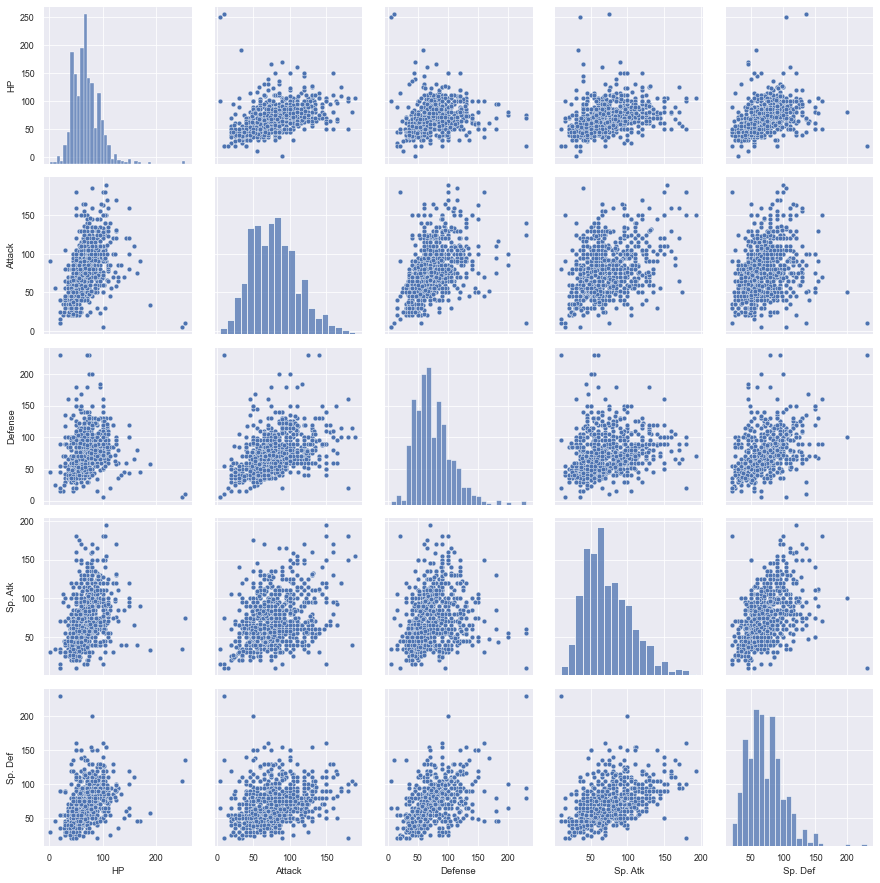

In [11]:
sub_df = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']]
g = sns.PairGrid(sub_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

### **Linear regression with one feature "Attack"**

To start off our linear regression predictions, we will only use one feature at first and see what is returned. Based off of the analysis we conduct, we will add more features.

In [12]:
X = df[['Attack']].values
y = df['HP'].values

regr = LinearRegression()
regr.fit(X,y)


LinearRegression()

In this graph we will be displaying the relationship between HP and Attack of a Pokemon. In doing so, we can visually see if there are some correlations between the two. We can see that the majority of the data follows the regression line with only a few outliers.

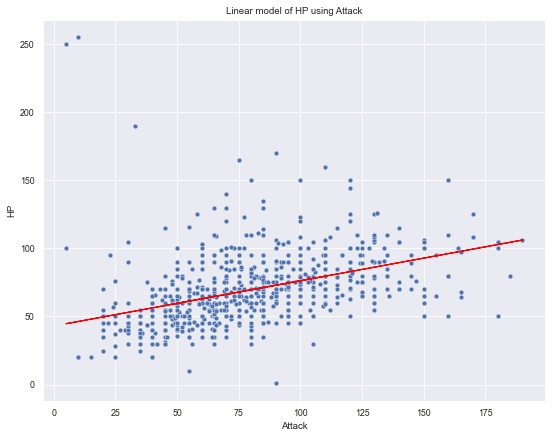

In [13]:
Y_pred = regr.predict(X)
sns.scatterplot(data = df, x ='Attack', y = 'HP')
plt.plot(X, Y_pred, color = 'red')
plt.title("Linear model of HP using Attack")
plt.show()

This model shows that for every increase on Attack units our prediction in HP will go up by .33 health points!

In [14]:
print('Intercept: ', "{:.2f}".format(regr.intercept_))
print('Coefficient for Attack: ', "{:.2f}".format(regr.coef_[0]))
print('r-squared value:', "{:.2f}".format(regr.score(X,y)))

Intercept:  43.01
Coefficient for Attack:  0.33
r-squared value: 0.18


### **Linear regression with features: "Attack", "Defense", and "Sp. Atk"**

Continuing with our linear regression predictions, we willbe adding the features: _Attack_, _Defense_, and _Sp. Atk_ and see what is returned. Based off of the analysis we conduct, we will look into adding a few more features until we obtain the reslults desired. As we can see, _Attack_ still shows as the one that most affects HP change.

In [15]:
predictors = ['Attack', 'Defense', 'Sp. Atk']
target = 'HP'
X = df[predictors].values
y = df[target]

regr2 = LinearRegression()
regr2.fit(X,y)

LinearRegression()

In [16]:
print('Intercept: ', "{:.2f}".format(regr2.intercept_))
print('Coefficient for Attack: ', "{:.2f}".format(regr2.coef_[0]))
print('Coefficient for Defense: ', "{:.2f}".format(regr2.coef_[1]))
print('Coefficient for Sp. Atk: ', "{:.2f}".format(regr2.coef_[2]))

Intercept:  33.89
Coefficient for Attack:  0.24
Coefficient for Defense:  0.04
Coefficient for Sp. Atk:  0.18


In [17]:
# Formula to compare predicted with actual data findings
def plot_actual_predicted(actual, predicted, title):
   mins = np.minimum(actual,predicted)
   maxs = np.maximum(actual, predicted)
   sns.scatterplot(x=actual, y=predicted)
   plt.plot([mins.min(),maxs.max()],[mins.min(),maxs.max()], color='red')
   plt.title(title)
   plt.xlabel('actual')
   plt.ylabel('predicted')
   plt.show()

### **Displaying first prediction results with 3 features**

Here we are displaying the correlation that occurs between _Attack_, _Defense_, and _Sp. Atk_. With this linear regression graph, we are able to see that the majority of the data is getting closer together with less outliers. The more features being added, the more correlation that can be seen in the graph and the better the predictions are becoming.

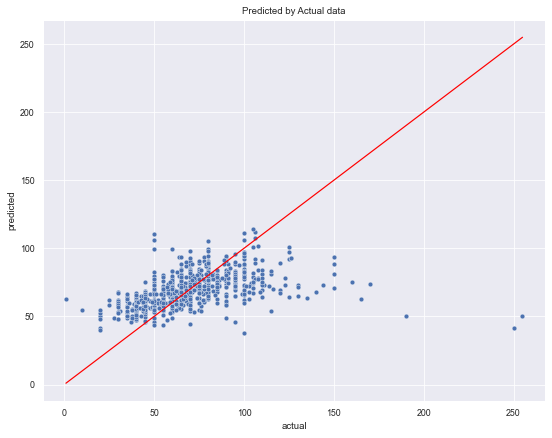

In [18]:
plot_actual_predicted(y, regr2.predict(X), 'Predicted by Actual data')

In [19]:
# **Splitting the data into test and train sets**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### **Adding "Generation" to the go along with previous features used**

In this graph, we are able to see that the predicted versus the actual is realtively close to the linear regression with a few outliers spreading off to the right of the data. 

In [20]:
predictors = ['Attack', 'Defense', 'Sp. Atk', 'Generation']
target = 'HP'
X = df[predictors].values
y = df[target]

regr3 = LinearRegression()
regr3.fit(X_train,y_train)

LinearRegression()

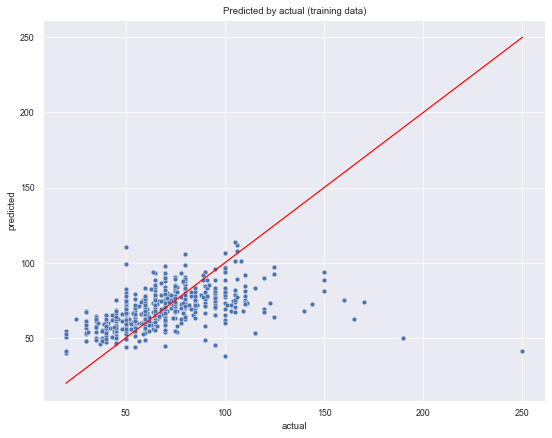

In [21]:
plot_actual_predicted(y_train, regr2.predict(X_train), 'Predicted by actual (training data)')

### **Comparing train and test data**

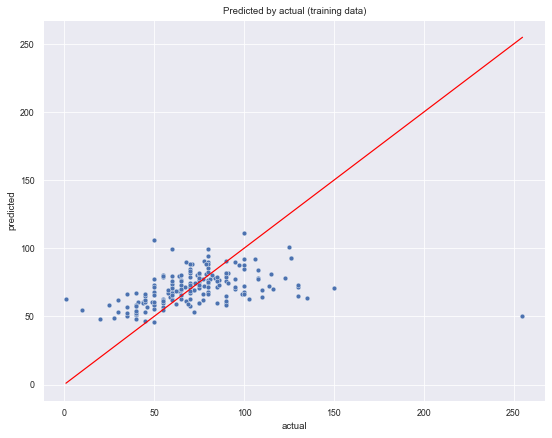

In [22]:
plot_actual_predicted(y_test, regr2.predict(X_test), 'Predicted by actual (training data)')

**Squareroot of the Variance of the residuals result on test set**

In [23]:
print("RMSE: " , "{:.2f}".format(np.sqrt(np.mean((regr3.predict(X_test) - y_test)**2))))

RMSE:  25.50


**Going for broke and adding most features**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
predictors = ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed','Generation']
target = 'HP'
X = df[predictors].values
y = df[target]

regr4 = LinearRegression()
regr4.fit(X_train,y_train)

LinearRegression()

In [25]:
print('RMSE of reg4: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, regr4.predict(X_test)))))
print('r-squared value of reg4: {:.4f}'.format(regr4.score(X_train,y_train)))

RMSE of reg4: 25.47
r-squared value of reg4: 0.2531


RMSE yileds better results

### **Plot on test data shows a better fit, still not the best**

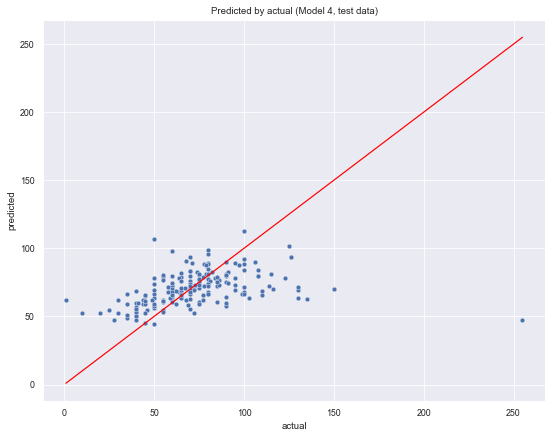

In [26]:
plot_actual_predicted(y_test, regr4.predict(X_test), 'Predicted by actual (Model 4, test data)')

**Next we scale data and test again**

The following will be a series of scaling the data and retesting everyting in order to obtain the R-squared values and see what the actual percentage of the prediceted data was accurate. 

In [27]:
y=np.array(df['HP'])
X = np.array(df[ ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed','Generation']])
X_s = zscore(X)

**Comparing New r-squared Value**

We can see below that we are getting slightly better results after scaling the data.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.25, random_state=0)

regs = LinearRegression()
regs.fit(X_train, y_train)

print('r-squared value of regs: {:.4f}'.format(regs.score(X_train,y_train)))

r-squared value of regs: 0.2954


**Use ALL the numeric features**

Here we will be using every feature starting from _Attack_ and ending on _Generation_. In doing so, we expect to see a greater prediction and more correlation between the features. One weird but neat thing that is observed below is that the Defense and the Speed both reduce as the HP goes up. This makes sense if you are visualizing a Pokemon fighting a bigger Pokemon. The chances of the smaller Pokemon being able to hit a bigger target makes sense. Evasiveness would be less for a bigger Pokemon in comparison to a smaller Pokemon causing the defense to be lower. Generation, Attack and SP.Def seem to be the largest contributors to change. 

In [29]:
y = df['HP']
X = df.loc[:,'Attack':'Generation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

reg5 = LinearRegression()
reg5.fit(X_train,y_train)
j = 0
print('Intercept: ', "{:.2f}".format(reg5.intercept_))
print('Coefficients:')
for item in reg5.coef_:
  print(" ", X.columns[j],"{:.2f}".format(item))
  j+=1


Intercept:  28.89
Coefficients:
  Attack 0.29
  Defense -0.04
  Sp. Atk 0.10
  Sp. Def 0.24
  Speed -0.09
  Generation 0.33


**R-square and RMSE for all features**

RMSE should be a bit lower still.

In [30]:
print('r-squared value of reg5: {:.2f}'.format(reg5.score(X_train,y_train)))
print('RMSE of reg4: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, reg5.predict(X_test)))))

r-squared value of reg5: 0.30
RMSE of reg4: 24.44


**Using PolynomialFeatures**

In [31]:
pf = PolynomialFeatures(degree = 2 , include_bias = False)
pf.fit(X)
X_poly = pf.transform(X)

In [32]:
X_poly.shape

(800, 27)

**Test/train on all plynomial features!**

We are able to see that we are getting a lower nunmber than previously which is a good thing to see.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=0)
reg6 = LinearRegression()
reg6.fit(X_train,y_train)
print('RMSE of reg6: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, reg6.predict(X_test)))))

RMSE of reg6: 22.85


**Find single best polyfeature**

Here, we are trying to get the best polyfeature in order to predict the Pokemon's HP more accurately. The numbers for the Best RMSE keep going down which is a good thing.

In [34]:
i_min = np.array([]);
rmse_min = 100
x = 0
while x < X_train.shape[1]:
  scores = cross_val_score(LinearRegression(), X_train[:,[x]], y_train, scoring='neg_mean_squared_error', cv=5)
  rmse_test = np.sqrt(-scores.mean())
  if rmse_test <= rmse_min:
    rmse_min = rmse_test
    i_min = x
  x+=1
print('Best Feature: {}, Best RMSE: {:.2f}'.format(pf.get_feature_names()[i_min], rmse_min))

Best Feature: x0 x3, Best RMSE: 21.44


**Best combinations of 5 features**

In [35]:
remaining = list(range(X_train.shape[1]))
selected = []
n = 5
while len(selected) < n:
  #first run for starting best feature
  if (len(selected) == 0):
    for i in remaining:
      scores = cross_val_score(LinearRegression(), X_train[:,[i]], y_train, scoring='neg_mean_squared_error', cv=5)
      rmse_test = np.sqrt(-scores.mean())
      if rmse_test <= rmse_min:
        rmse_min = rmse_test
        i_min = i
  else:
    for i in remaining:
      selected.insert(0,i)
      scores = cross_val_score(LinearRegression(),X_train[:,selected], y_train, scoring='neg_mean_squared_error', cv=5)
      rmse_test = np.sqrt(-scores.mean())
      if rmse_test < rmse_min:
        rmse_min = rmse_test 
        i_min = i
      selected.pop(0)
  remaining.remove(i_min)
  selected.append(i_min)
  print('num features: {}; rmse: {:.2f}'.format(len(selected), rmse_min))

num features: 1; rmse: 21.44
num features: 2; rmse: 21.30
num features: 3; rmse: 21.18
num features: 4; rmse: 21.11
num features: 5; rmse: 20.98


**RMSE of this 5 best features**

In [36]:
scores = cross_val_score(LinearRegression(),X_test[:,selected], y_test, scoring='neg_mean_squared_error', cv=5)
rmse_test = np.sqrt(-scores.mean())
print('Test RMSE with 10 features: {:.2f}'.format( rmse_test))   

Test RMSE with 10 features: 29.08


After analyzing the results, the difference between using plynomial features and not is not substantial enough to justify the usage. We should stick to using all initial non-polynomial features.

In [37]:
# **Making Predictions on Full dataFrame**
y = df['HP']
X = df.loc[:,'Attack':'Generation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
 
line_best = LinearRegression()
line_best.fit(X_train,y_train)
 
predictions = line_best.predict(X)

### **Adding columns for Predicted HP and Difference**

Here we are adding the column _Predicted HP_ and _Predicted % Dif_ in order to filter out the predictions which have a greater percentage of 0. This would mean that that specific Pokemon's HP was not predicted correctly. This will alllow us to gather a count of all the predictions that were incorrect and in return obtain a percentage of accuracy.

In [38]:
def perdif(v1, v2):
  return((v1-v2)/(v1+v2/2))*100

In [39]:
df['HP'] = df['HP'].astype(float)

df['Predicted HP'] = predictions
df['Predicted % dif'] = perdif(df['HP'],df['Predicted HP'])
display(df[df['Predicted % dif'] > 0.0])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Predicted HP,Predicted % dif
2,3,Venusaur,Grass,Poison,525,80.0,82,83,100,100,80,1,False,77.331939,2.248379
6,6,Charizard,Fire,Flying,534,78.0,84,78,109,85,100,1,False,73.600362,3.832431
11,9,Blastoise,Water,NaN,530,79.0,83,100,85,105,78,1,False,76.722386,1.940688
13,10,Caterpie,Bug,NaN,195,45.0,30,35,20,20,45,1,False,39.403733,8.649313
14,11,Metapod,Bug,NaN,205,50.0,20,55,25,25,30,1,False,38.718826,16.264805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,713,Avalugg,Ice,NaN,514,95.0,117,184,44,46,28,6,False,70.547916,18.769741
791,715,Noivern,Flying,Dragon,535,85.0,70,80,97,80,123,6,False,66.477514,15.665325
792,716,Xerneas,Fairy,NaN,680,126.0,131,95,131,98,99,6,True,93.857039,18.587426
793,717,Yveltal,Dark,Flying,680,126.0,131,95,131,98,99,6,True,93.857039,18.587426


**Amount of pokemon with a percentage differance of more than 0%**

Below we are able to see the total sum of Pokemon that had the HP incorrectly predicted.

In [40]:
print('Pokemon count with incorrect HP Predictions: ', (df[df['Predicted % dif'] > 0.0]).shape[0])

Pokemon count with incorrect HP Predictions:  337


**Running the prediction algo 1000 times and compute mean of pokemon with a percentage differance of more than 0%**

Below we are able to see that even after trying the prediction algorithm 1000 times, we still got the same result which is not that great. Next we will try KNN Regression to see if that prediction algorithm could give us better results.

In [41]:
n = 1000
tries = []
while n > 0:
  y = df['HP']
  X = df.loc[:,'Attack':'Generation']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

  line_best = LinearRegression()
  line_best.fit(X_train,y_train)

  predictions = line_best.predict(X)
  df['HP'] = df['HP'].astype(float)
  df['Predicted HP'] = predictions
  df['Predicted % dif'] = perdif(df['HP'],df['Predicted HP'])
  tries.append((df[df['Predicted % dif'] > 0.0]).shape[0])
  n -= 1
print('Pokemon count with incorrect HP Predictions over 1000 times:', sum(tries)/len(tries))

Pokemon count with incorrect HP Predictions over 1000 times: 337.0


# KNN Regression Prediction on HP

In [42]:
# for repeatability
np.random.seed(0)   

In [43]:
# select first set of predictor variables and target variables to be used with regression
predictors = ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def']
target = 'HP'
X = df[predictors].values
y = df[target].values

First prediction will also only use the full dataframe. We will use partial percentage of the dataframe after. 

In [44]:
# KNN 100%
indexes = np.random.choice(y.size, size=400)
X_mini = X[indexes]
y_mini = y[indexes]

In [45]:
# Split the data into training and test sets, and scale
scaler = StandardScaler()

# unscaled version (note that scaling is only used on predictor variables)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.30, random_state=42)

# scaled version
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [46]:
# sanity check
print(X_train.shape)
print(X_train[:3])

(280, 4)
[[-0.25965729  0.15460605 -0.05489393  0.87258133]
 [-0.10993727 -0.01357458  0.55991809  1.06587466]
 [ 0.78838285 -0.18175521  2.25065114  0.29270133]]


**Baseline performace**

Could This mean that KNNRegression is more effective than LinearRegression? We already have a better result than linear progression without having to modify any models so far. We shall see if KNN Regression could give us the desired predictions or at least be more accurate.

In [47]:
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

In [48]:
knn = KNeighborsRegressor(algorithm='brute')
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
RMSE = rmse(predictions, y_test)
print('RMSE: ', RMSE)

RMSE:  15.16431117239861


**Changing the Ks detrminating which is the best**

Here we are testing to see what the K value should be in order to obtain the best predictions and have a higher accuracy.

In [49]:
def get_train_test_rmse(regr, X_train, X_test, y_train, y_test):
  regr.fit(X_train, y_train)
  predict_train = regr.predict(X_train)
  predict_test = regr.predict(X_test)
  rmse_train = rmse(predict_train,y_train)
  rmse_test = rmse(predict_test, y_test)
  return rmse_train, rmse_test

n = 30
test_rmse = []
train_rmse = []
ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    regr = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    rmse_tr, rmse_te = get_train_test_rmse(regr, X_train, X_test, y_train, y_test)
    train_rmse.append(rmse_tr)
    test_rmse.append(rmse_te)
print('done')

# sanity check
print('Test RMSE when k = 5: {:0.1f}'.format(test_rmse[2]))

def get_best(ks, rmse):
    return ks[rmse.index(min(rmse))] , min(rmse)

best_k, best_rmse = get_best(ks, test_rmse)
print('Best k = {}, Best Test RMSE: {:0.1f}'.format(best_k, best_rmse))

1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  done
Test RMSE when k = 5: 15.2
Best k = 9, Best Test RMSE: 14.7


Now it's time to plot the test and training RMSE as a function of k, for all the k values in order to see how well the model will predict.

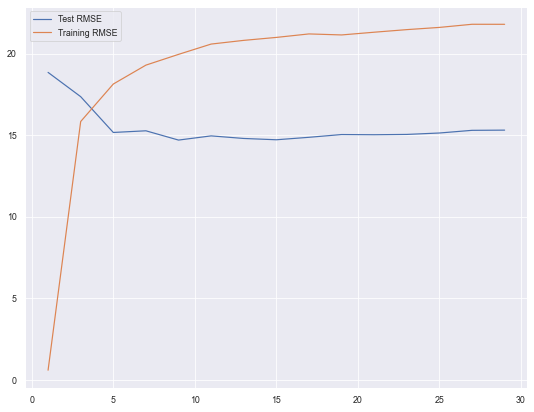

In [50]:
test = pd.Series(data = test_rmse, index = ks)
train = pd.Series(data = train_rmse, index = ks)
plt.plot(test.index, test, label="Test RMSE")
plt.plot(train.index, train, label = "Training RMSE")
plt.legend()
plt.show()

**Changing the distance metric**

Still trying to get the best RMSE results to have our predictions be more accurate. Changing the disance metric made little to no difference.

In [51]:
n = 30
test_rmse = []
train_rmse = []
ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    regr = KNeighborsRegressor(n_neighbors=k, algorithm='brute', metric = 'manhattan')
    rmse_tr, rmse_te = get_train_test_rmse(regr, X_train, X_test, y_train, y_test)
    train_rmse.append(rmse_tr)
    test_rmse.append(rmse_te)
print('done')

def get_best(ks, rmse):
    return ks[rmse.index(min(rmse))] , min(rmse)

best_k, best_rmse = get_best(ks, test_rmse)
print('best k = {}, best test RMSE: {:0.1f}'.format(best_k, best_rmse))

1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  done
best k = 11, best test RMSE: 14.1


**adding noise prediction (not neccesary)**

0  1  2  3  done


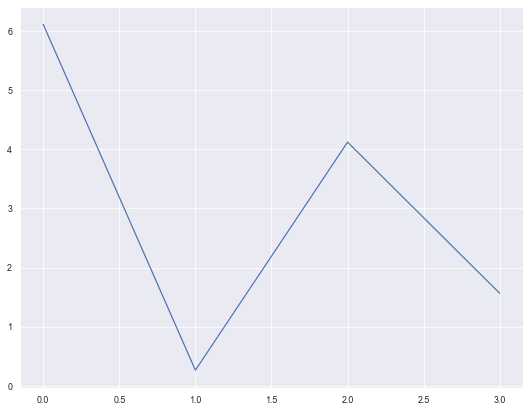

In [52]:
def add_noise_predictor(X):
    """ add a column of random values to 2D array X """
    noise = np.random.normal(size=(X.shape[0], 1))
    return np.hstack((X, noise))
    
k=10
noisy_test_rmse = []
noisy_train_rmse = []
xs = np.arange(4)
noisy_train = X_train.copy()
noisy_test = X_test.copy()
for x in xs:
  print(x, ' ', end='')
  noisy_train = add_noise_predictor(noisy_train)
  noisy_test = add_noise_predictor(noisy_test)
  regr = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
  rmse_tr, rmse_te = get_train_test_rmse(regr, noisy_train, noisy_test, y_train, y_test)
  noisy_train_rmse.append(rmse_tr)
  noisy_test_rmse.append(rmse_te)
print('done')

knn_10 = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
knn_10.fit(X_train, y_train)
predictions_k10 = knn_10.predict(X_test)
base_rmse = rmse(predictions_k10, y_test)
perc_dif = pd.Series(index = xs, data = (100 * (noisy_test_rmse - base_rmse)/base_rmse))
plt.plot(perc_dif)
plt.show()

**Test with unscaled data**

There is not much of a difference observed. Only from (0.6) - 4.1%

In [53]:
n_raw = 30
test_rmse_raw = []
train_rmse_raw = []
ks_raw = np.arange(1, n_raw+1, 2)

for k in ks_raw:
    print(k, ' ', end='')
    regr_raw = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    rmse_tr_raw, rmse_te_raw = get_train_test_rmse(regr_raw, X_train_raw, X_test_raw, y_train, y_test)
    train_rmse_raw.append(rmse_tr_raw)
    test_rmse_raw.append(rmse_te_raw)
print('done')

best_k_raw, best_rmse_raw = get_best(ks_raw, test_rmse_raw)
print('best k = {}, best test RMSE: {:0.1f}'.format(best_k, best_rmse_raw))

1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  done
best k = 11, best test RMSE: 14.7


**Testing different algorithms to obtain highest accuracy**

In [54]:
k=10
alg_test_rmse = []
algs = ['ball_tree', 'kd_tree', 'brute']
xs = np.arange(3)
for x in xs:
  print(algs[x], ' ', end='')
  alg_regr = KNeighborsRegressor(n_neighbors=k, algorithm=algs[x])
  rmse_tr, rmse_te = get_train_test_rmse(alg_regr, X_train, X_test, y_train, y_test)
  alg_test_rmse.append(rmse_te)
print('done')

best_alg, best_rmse_alg = get_best(algs, alg_test_rmse)
print('best algorithm = {}, best test RMSE: {:0.1f}'.format(best_alg, best_rmse_alg))

ball_tree  kd_tree  brute  done
best algorithm = brute, best test RMSE: 14.8


**Testing different weighting**

In [55]:
k=10
wei_test_rmse = []
wei_param = ['uniform', 'distance']
xs = np.arange(2)
for x in xs:
  print(wei_param[x], ' ', end='')
  wei_regr = KNeighborsRegressor(n_neighbors=k, weights=wei_param[x])
  
  wei_test_rmse.append(rmse_te)
print('done')

best_wei, best_rmse_wie = get_best(wei_param, wei_test_rmse)
print('best weighting = {}, best test RMSE: {:0.1f}'.format(best_wei, best_rmse_wie))

uniform  distance  done
best weighting = uniform, best test RMSE: 14.8


**Using all best hyperparameters**

We can see below that using the best hyperparameters analyzed from before give us much better RMSE results!

In [56]:
knn_regr = KNeighborsRegressor(n_neighbors= 11, weights='distance', algorithm='brute', metric= 'manhattan')
knn_regr.fit(X, y)
rmse_tr, rmse_te = get_train_test_rmse(knn_regr, X_train, X_test, y_train, y_test)
print('RMSE: ', rmse_te)

RMSE:  12.496828050891105


In [57]:
# **Making predictions on full dataframe**
predictions = knn_regr.predict(X)

### **Adding columns for Predicted HP and Difference**

In [58]:
def perdif(v1, v2):
  return((v1-v2)/(v1+v2/2))*100

In [59]:
df['HP'] = df['HP'].astype(float)

df['Predicted HP'] = predictions
df['Predicted % dif'] = perdif(df['HP'],df['Predicted HP'])
display(df[df['Predicted % dif'] > 0.0])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Predicted HP,Predicted % dif
44,39,Jigglypuff,Normal,Fairy,270,115.0,45,20,45,25,20,1,False,102.101087,7.768064
45,40,Wigglytuff,Normal,Fairy,435,140.0,70,45,85,50,45,1,False,102.096269,19.839885
96,89,Muk,Poison,NaN,500,105.0,105,75,65,100,50,1,False,102.094763,1.861766
120,112,Rhydon,Ground,Rock,485,105.0,130,120,45,45,40,1,False,102.094820,1.861729
121,113,Chansey,Normal,NaN,450,250.0,5,5,35,105,50,1,False,102.100019,49.128044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,673,Gogoat,Grass,NaN,531,123.0,100,62,97,81,68,6,False,102.094820,12.011198
769,699,Aurorus,Rock,Ice,521,123.0,77,72,99,92,58,6,False,102.094820,12.011198
792,716,Xerneas,Fairy,NaN,680,126.0,131,95,131,98,99,6,True,102.093816,13.502740
793,717,Yveltal,Dark,Flying,680,126.0,131,95,131,98,99,6,True,102.093816,13.502740


**Amount of pokemon with a percentage differance of more than 0%**

Below we are checking the count of the Pokemon's HP that was not predicted correctly.

In [60]:
print('Pokemon count with incorrect HP Predictions: ', (df[df['Predicted % dif'] > 0.0]).shape[0])

Pokemon count with incorrect HP Predictions:  66


**Running the prediction algo 1000 times and compute mean of pokemon with a percentage differance of more than 0%**

In [61]:
n = 1000
tries = []
while n > 0:
  knn_regr = KNeighborsRegressor(n_neighbors= 11, weights='distance', algorithm='brute', metric= 'manhattan')
  knn_regr.fit(X, y)
  predictions = knn_regr.predict(X)
  df['HP'] = df['HP'].astype(float)
  df['Predicted HP'] = predictions
  df['Predicted % dif'] = perdif(df['HP'],df['Predicted HP'])
  tries.append((df[df['Predicted % dif'] > 0.0]).shape[0])
  n -= 1
print('Pokemon count with incorrect HP Predictions with 1000 tries: ', sum(tries)/len(tries))

Pokemon count with incorrect HP Predictions with 1000 tries:  9.0


# KNN Classification Prediction on Type 1

**First we need to turn Type 1 into a int column**

Here we are attempting to see if prediction would be better is we try to predict _Type 1_ instead of a Pokemon's HP.

In [62]:
df_c = df.copy()
x = 0
for i in df_c['Type 1']:
  if df_c['Type 1'][x] == 'Water':
    df_c['Type 1'][x] = 1
  if df_c['Type 1'][x] == 'Normal':
    df_c['Type 1'][x] = 2
  if df_c['Type 1'][x] == 'Grass':
    df_c['Type 1'][x] = 3
  if df_c['Type 1'][x] == 'Bug':
    df_c['Type 1'][x] = 4
  if df_c['Type 1'][x] == 'Psychic':
    df_c['Type 1'][x] = 5
  if df_c['Type 1'][x] == 'Fire':
    df_c['Type 1'][x] = 6
  if df_c['Type 1'][x] == 'Electric':
    df_c['Type 1'][x] = 7
  if df_c['Type 1'][x] == 'Rock':
    df_c['Type 1'][x] = 8
  if df_c['Type 1'][x] == 'Ghost':
    df_c['Type 1'][x] = 9
  if df_c['Type 1'][x] == 'Dragon':
    df_c['Type 1'][x] = 10
  if df_c['Type 1'][x] == 'Ground':
    df_c['Type 1'][x] = 11
  if df_c['Type 1'][x] == 'Dark':
    df_c['Type 1'][x] = 12
  if df_c['Type 1'][x] == 'Poison':
    df_c['Type 1'][x] = 13
  if df_c['Type 1'][x] == 'Fighting':
    df_c['Type 1'][x] = 14
  if df_c['Type 1'][x] == 'Steel':
    df_c['Type 1'][x] = 15
  if df_c['Type 1'][x] == 'Ice':
    df_c['Type 1'][x] = 16
  if df_c['Type 1'][x] == 'Fairy':
    df_c['Type 1'][x] = 17
  if df_c['Type 1'][x] == 'Flying':
    df_c['Type 1'][x] = 18  
  x+=1
df_c.head(10)
df_c['Type 1'] = pd.to_numeric(df_c['Type 1'])
df_c.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                800 non-null    int64  
 1   Name             800 non-null    object 
 2   Type 1           800 non-null    int64  
 3   Type 2           414 non-null    object 
 4   Total            800 non-null    int64  
 5   HP               800 non-null    float64
 6   Attack           800 non-null    int64  
 7   Defense          800 non-null    int64  
 8   Sp. Atk          800 non-null    int64  
 9   Sp. Def          800 non-null    int64  
 10  Speed            800 non-null    int64  
 11  Generation       800 non-null    int64  
 12  Legendary        800 non-null    bool   
 13  Predicted HP     800 non-null    float64
 14  Predicted % dif  800 non-null    float64
dtypes: bool(1), float64(3), int64(9), object(2)
memory usage: 88.4+ KB


**Set predictors, split and scale the data.**

In [63]:
y = df_c['Type 1']
X = df_c.loc[:,'HP':'Generation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#sanity Check
print(X_train[:10])

[[ 0.19965661  0.88852169  1.29746158 -0.38370156  0.60101506  0.04920228
   1.53085826]
 [ 0.32379543  0.08877219 -0.10309665 -0.03880128  0.18910443  0.76487186
  -1.39901401]
 [-0.71069477 -1.0308771  -0.88118455 -0.97943841 -1.30875242 -0.53634555
  -0.2270651 ]
 [-0.50379673 -1.0308771  -0.72556697 -0.6658927  -0.18535978  0.43956751
  -0.81303955]
 [-0.09000065  0.72857179 -0.10309665  0.43151728  0.37633653  1.25282839
  -1.39901401]
 [-0.50379673 -0.8709272  -1.03680213 -0.82266555 -1.12152031  0.27691533
   0.94488381]
 [-0.91759281 -0.5510274  -0.88118455 -1.29298411 -0.93428821 -0.37369338
   0.94488381]
 [-0.71069477 -0.16714764 -1.19241971 -0.97943841 -1.30875242 -0.04838902
   0.94488381]
 [ 0.11689739 -1.190827   -0.72556697 -0.35234699 -0.7470561  -1.34960644
  -0.2270651 ]
 [-1.33138889  0.24872209 -0.88118455 -0.97943841 -1.30875242  0.27691533
  -1.39901401]]


**Start training**

In [64]:
knn_class = KNeighborsClassifier(algorithm ="brute")
knn_class.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

**Prediction start**

In [65]:
predictions = knn_class.predict(X)

In [66]:
print(predictions[:10])
print(df_c['Type 1'][:10].values)
print((predictions == df_c['Type 1'].values).mean())


[ 2  2  2  2  2  2  2 11  2  2]
[3 3 3 3 6 6 6 6 6 1]
0.13125


### **Conclusion**

The Pokemon-HP-Predictions project uses a modified regression model based on 8 numerical features: #, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, and Generation. The numeric features in this dataframe are not direclty co-related to the Type 1 field. Best to use KNeighborsRegressor and focus on predicting HP.

After running our predictions, we observed that there was an accuracy of **99.98875%** that the Pokemon's HP would be predicted correctly based on the stats of a Pokemon. That's a really high percantage being predicted correctly.